In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv('GHDomains.csv')
with open('topics_list.pkl', 'rb') as f:
    vocab = pickle.load(f)

In [3]:
vectorizer = TfidfVectorizer(stop_words='english', vocabulary=vocab)
X = vectorizer.fit_transform(df['clean_readme'].astype(str))

In [4]:
mapping = {}
labels = df['Domain'].unique()
for cat, num in zip(labels, range(len(labels))):
    mapping[cat] = num

y = df['Domain'].map(mapping).to_list()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.1, random_state=42)


pipe = Pipeline([('clf', DummyClassifier())]) # Placeholder Estimator

# Candidate learning algorithms and their hyperparameters
search_space = [{'clf':[DummyClassifier(strategy="most_frequent")]},
                {'clf':[SVC(class_weight='balanced',max_iter=10000)],
                 'clf__kernel':['linear', 'poly', 'rbf']},
                {'clf':[GaussianNB()],
                 'clf__var_smoothing': np.logspace(0,-9, num=100)},
                {'clf':[RandomForestClassifier(class_weight='balanced',n_jobs=-1)],
                 'clf__n_estimators': [250,500]}]

scoring = ['f1_weighted', 'precision_weighted', 'recall_weighted', 'accuracy']
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

search = GridSearchCV(pipe, search_space, scoring='f1_weighted', cv=cv, refit=True, verbose=2)
search.fit(X_train, y_train)


Fitting 10 folds for each of 106 candidates, totalling 1060 fits
[CV] END ......clf=DummyClassifier(strategy='most_frequent'); total time=   0.0s
[CV] END ......clf=DummyClassifier(strategy='most_frequent'); total time=   0.0s
[CV] END ......clf=DummyClassifier(strategy='most_frequent'); total time=   0.0s
[CV] END ......clf=DummyClassifier(strategy='most_frequent'); total time=   0.0s
[CV] END ......clf=DummyClassifier(strategy='most_frequent'); total time=   0.0s
[CV] END ......clf=DummyClassifier(strategy='most_frequent'); total time=   0.0s
[CV] END ......clf=DummyClassifier(strategy='most_frequent'); total time=   0.0s
[CV] END ......clf=DummyClassifier(strategy='most_frequent'); total time=   0.0s
[CV] END ......clf=DummyClassifier(strategy='most_frequent'); total time=   0.0s
[CV] END ......clf=DummyClassifier(strategy='most_frequent'); total time=   0.0s
[CV] END clf=SVC(class_weight='balanced', max_iter=10000), clf__kernel=linear; total time=   3.1s
[CV] END clf=SVC(class_weig

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('clf', DummyClassifier())]),
             param_grid=[{'clf': [DummyClassifier(strategy='most_frequent')]},
                         {'clf': [SVC(class_weight='balanced', max_iter=10000)],
                          'clf__kernel': ['linear', 'poly', 'rbf']},
                         {'clf': [GaussianNB()],
                          'clf__var_smoothing': array([1.00000000e+00, 8...
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                         {'clf': [RandomForestClassifier(class_weight='balanced',
                                                         n_jobs=-1)],
                          'clf__n_estimators': [250, 500]}],


In [5]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__kernel,param_clf__var_smoothing,param_clf__n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,3.457237,0.048919,0.798153,0.010663,"SVC(class_weight='balanced', max_iter=10000)",rbf,NaN,NaN,"{'clf': SVC(class_weight='balanced', max_iter=...",0.602429,...,0.627374,0.595972,0.596848,0.601117,0.617168,0.574179,0.603292,0.596166,0.019750,1
1,2.567576,0.058339,0.456525,0.012510,"SVC(class_weight='balanced', max_iter=10000)",linear,NaN,NaN,"{'clf': SVC(class_weight='balanced', max_iter=...",0.592700,...,0.579808,0.583451,0.561449,0.578425,0.576858,0.543229,0.559734,0.566334,0.020353,2
2,4.245965,0.022885,0.548828,0.005926,"SVC(class_weight='balanced', max_iter=10000)",poly,NaN,NaN,"{'clf': SVC(class_weight='balanced', max_iter=...",0.595394,...,0.592582,0.545057,0.552537,0.567650,0.548316,0.564509,0.567433,0.561711,0.025320,3
105,0.810652,0.042230,0.116810,0.030245,RandomForestClassifier(class_weight='balanced'...,NaN,NaN,500,{'clf': RandomForestClassifier(class_weight='b...,0.557691,...,0.533238,0.582069,0.554419,0.567586,0.580541,0.543694,0.559371,0.556332,0.015728,4
104,0.601228,0.226551,0.117148,0.030319,RandomForestClassifier(class_weight='balanced'...,NaN,NaN,250,{'clf': RandomForestClassifier(class_weight='b...,0.548974,...,0.536989,0.595683,0.533421,0.567485,0.570166,0.523716,0.539321,0.550488,0.020429,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.019064,0.000115,0.003409,0.000019,GaussianNB(),NaN,0.0,NaN,"{'clf': GaussianNB(), 'clf__var_smoothing': 1....",0.303623,...,0.299909,0.292584,0.301470,0.315206,0.304504,0.337038,0.319603,0.304457,0.017243,102
101,0.019053,0.000077,0.003412,0.000027,GaussianNB(),NaN,0.0,NaN,"{'clf': GaussianNB(), 'clf__var_smoothing': 1....",0.296727,...,0.299909,0.292991,0.299400,0.318358,0.299019,0.337038,0.319368,0.303264,0.017982,103
102,0.019162,0.000176,0.003426,0.000022,GaussianNB(),NaN,0.0,NaN,"{'clf': GaussianNB(), 'clf__var_smoothing': 1....",0.294325,...,0.303718,0.293515,0.299400,0.320324,0.293332,0.339952,0.322575,0.302943,0.020163,104
103,0.019106,0.000155,0.003433,0.000036,GaussianNB(),NaN,0.0,NaN,"{'clf': GaussianNB(), 'clf__var_smoothing': 1e...",0.292159,...,0.306024,0.295304,0.299400,0.319475,0.293332,0.337263,0.317729,0.302304,0.019207,105


In [6]:
search.best_estimator_, search.best_score_

(Pipeline(steps=[('clf', SVC(class_weight='balanced', max_iter=10000))]),
 0.5961657069680719)

In [7]:
y_pred = search.predict(X_test)
target_names = ['Documentation', 'Web libraries and frameworks', 'Software tools','System software','Non-web libraries and frameworks','Application software']
print(classification_report(y_test, y_pred, target_names=target_names))

                                  precision    recall  f1-score   support

                   Documentation       0.45      0.45      0.45        42
    Web libraries and frameworks       0.76      0.73      0.75       161
                  Software tools       0.53      0.55      0.54       104
                 System software       0.29      0.41      0.34        17
Non-web libraries and frameworks       0.65      0.59      0.62       122
            Application software       0.48      0.56      0.51        54

                        accuracy                           0.60       500
                       macro avg       0.53      0.55      0.54       500
                    weighted avg       0.61      0.60      0.61       500



Epoch [10/50], Train Loss: 1.4921, Train Accuracy: 56.80%, Val Loss: 1.4988, Val Accuracy: 50.80%
Epoch [20/50], Train Loss: 1.2210, Train Accuracy: 60.64%, Val Loss: 1.2517, Val Accuracy: 55.40%
Epoch [30/50], Train Loss: 1.0313, Train Accuracy: 63.16%, Val Loss: 1.1324, Val Accuracy: 56.80%
Epoch [40/50], Train Loss: 0.9113, Train Accuracy: 67.33%, Val Loss: 1.0872, Val Accuracy: 57.00%
Epoch [50/50], Train Loss: 0.8213, Train Accuracy: 70.49%, Val Loss: 1.0836, Val Accuracy: 57.80%


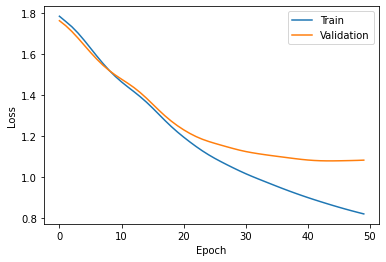

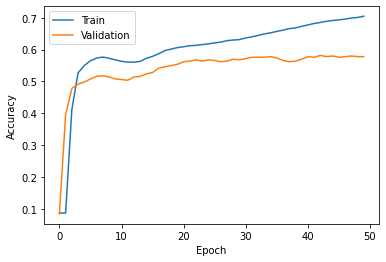

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create a simple neural network model using PyTorch
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


# Define the hyperparameters for the model and the optimizer
input_size = X_train.shape[1]
hidden_size = 32
num_classes = 6
learning_rate = 0.01
num_epochs = 50

# Create the model and the optimizer
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train).float()
X_test_tensor = torch.tensor(X_test).float()
y_train_tensor = torch.tensor(y_train).long()
y_test_tensor = torch.tensor(y_test).long()

# Train the model on the training set
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = accuracy_score(y_train_tensor, predicted)
    
    # Record the training loss and accuracy
    train_losses.append(loss.item())
    train_accuracies.append(accuracy)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Evaluate the model on the validation set
    with torch.no_grad():
        outputs = model(X_test_tensor)
        val_loss = criterion(outputs, y_test_tensor)
        _, predicted = torch.max(outputs.data, 1)
        val_accuracy = accuracy_score(y_test_tensor, predicted)
        
        # Record the validation loss and accuracy
        val_losses.append(val_loss.item())
        val_accuracies.append(val_accuracy)
    
    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Train Loss: {:.4f}, Train Accuracy: {:.2f}%, Val Loss: {:.4f}, Val Accuracy: {:.2f}%'.format(epoch+1, num_epochs, loss.item(), accuracy * 100, val_loss.item(), val_accuracy * 100))

# Plot the training and validation loss
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



